## Импорт необходимых модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics 


## Загружаем датасет

In [41]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['type'] = iris.target

In [1]:
df.head(10) 

NameError: name 'df' is not defined

Датасет имеет 5 признаков
* sepal length(cm) - длина чашелистика
* sepal width(cm) - ширина чашелистика
* petal length(cm) - длина лепестка
* petal width(cm) - ширина лепестка
* type - тип цветка (Целевая переменная)


### Разведочный анализ

In [43]:
# количество строк и столбцов
df.shape

(150, 5)

In [44]:
# выводим типы данных
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
type                   int64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   type               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Визуальный анализ

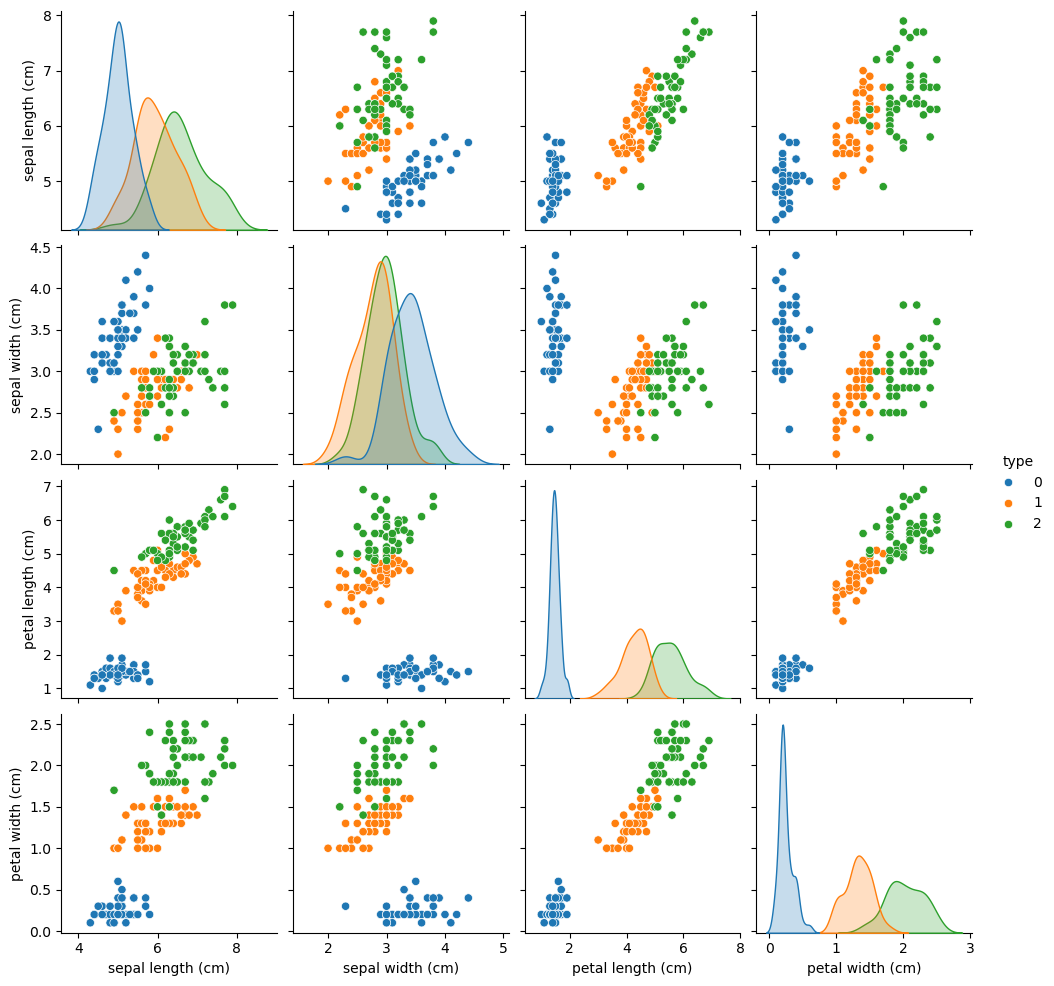

In [46]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','type']], hue = 'type', palette='tab10')


<Axes: >

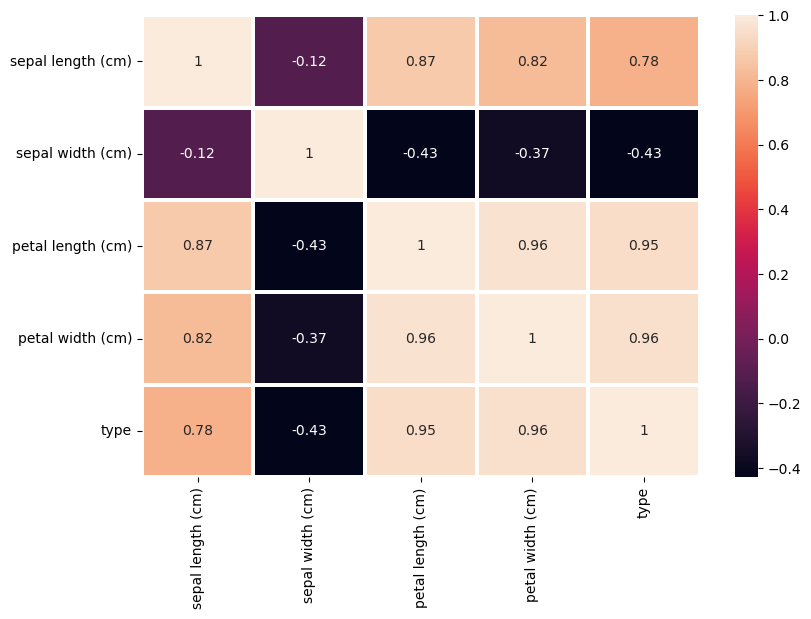

In [47]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot = True, linewidths=1.5)

In [48]:
X = df.iloc[:, [2, 3]].values 

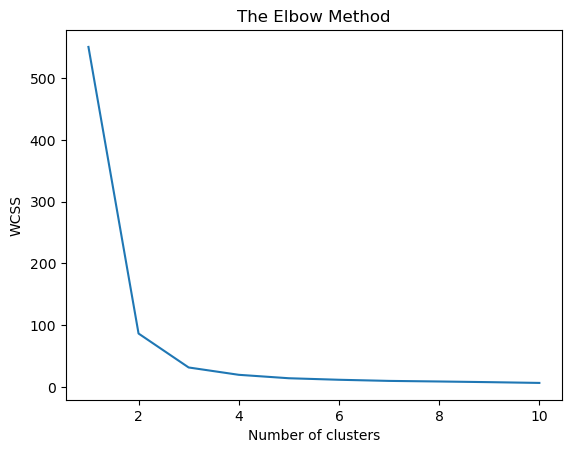

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)


In [51]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [52]:
pred=kmeans.fit_predict(X)

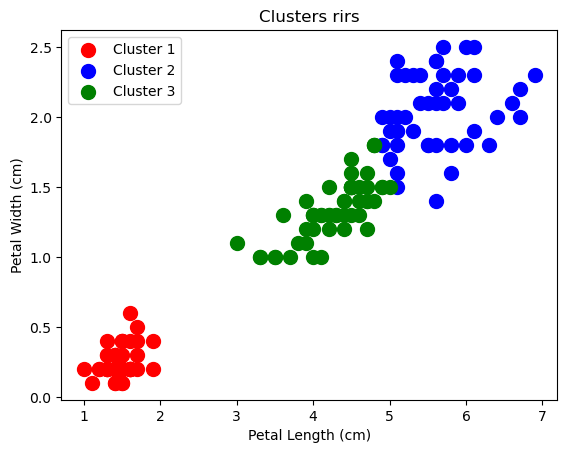

In [53]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters rirs')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [54]:
metrics.silhouette_score(X, pred)

0.6604800083974887

In [55]:
metrics.calinski_harabasz_score(X, pred)

1217.1934326018418

In [56]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.4847299226047572

In [57]:
scores = []
values = np.arange(2, 10)
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.7653904101258123

Number of clusters = 3
Silhouette score = 0.6604800083974887

Number of clusters = 4
Silhouette score = 0.6128714659599253

Number of clusters = 5
Silhouette score = 0.5883732712110276

Number of clusters = 6
Silhouette score = 0.5769601940397073

Number of clusters = 7
Silhouette score = 0.5785310053208864

Number of clusters = 8
Silhouette score = 0.590835070574698

Number of clusters = 9
Silhouette score = 0.5866932137871327


In [58]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

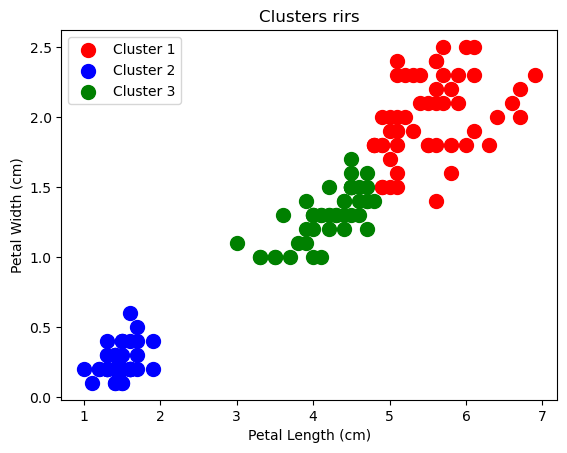

In [59]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters rirs')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [60]:
metrics.silhouette_score(X, y_hc)

0.6573949269287823

In [61]:
metrics.calinski_harabasz_score(X, y_hc)

1194.0247602646912

In [62]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [63]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')

In [64]:
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [65]:
dist = dist[:, -1]

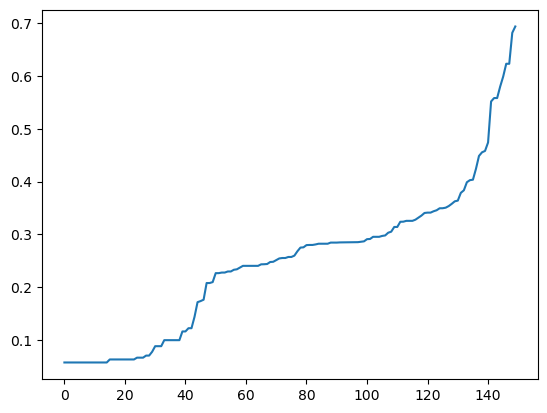

In [66]:
dist = np.sort(dist)
plt.plot(dist)

In [67]:
eps = 0.5
min_samples = 7

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', min_samples=7)

In [69]:
labels = dbscan.labels_

In [70]:
pd.Series(labels).value_counts()

1    100
0     50
Name: count, dtype: int64

Text(0, 0.5, 'Petal Width (cm)')

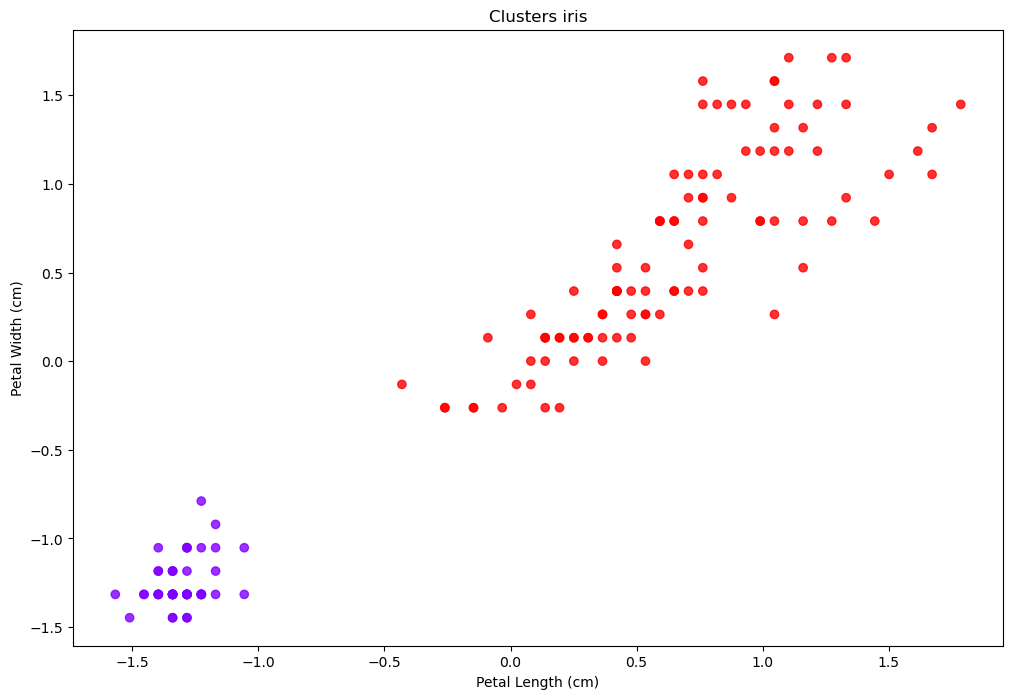

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.title('Clusters iris')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

In [72]:
metrics.silhouette_score(X, labels)

0.7433719503339133

In [73]:
metrics.calinski_harabasz_score(X, labels)

671.6603081816857

In [74]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.8435335537654189

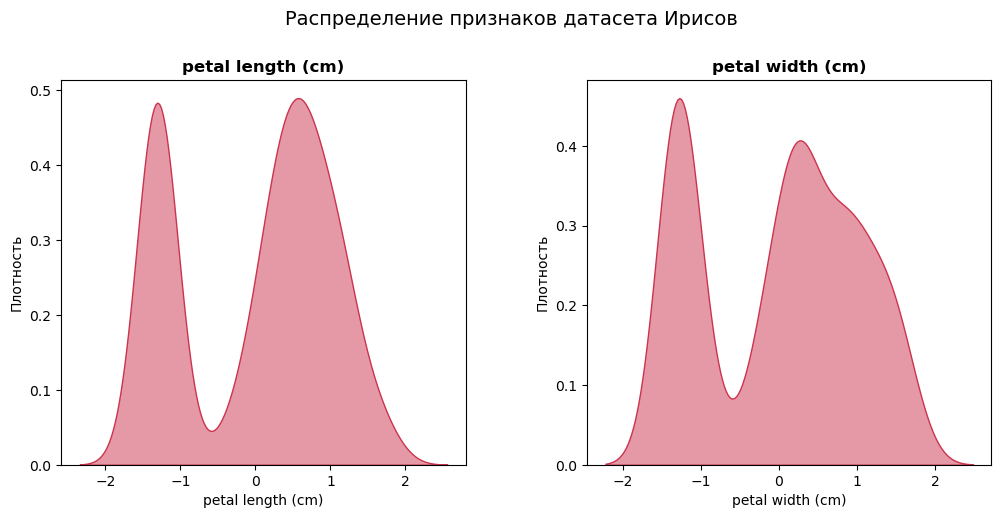

In [75]:
# Преобразуем наши данные обратно в DataFrame
X_df = X[[]]
X_df = pd.DataFrame(X, columns=['petal length (cm)', 'petal width (cm)'])

# Создаем матрицу графиков для визуализации распределения признаков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Расстояние между графиками
plt.subplots_adjust(wspace=0.3)

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(X_df.columns):
    ax = axes[i]
    sns.kdeplot(data=X_df,
                x=column,
                fill=True,
                alpha=0.5,
                bw_adjust=.7,
                color=[0.8, 0.2, 0.3],
                ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Плотность', fontsize=10)

plt.suptitle('Распределение признаков датасета Ирисов', fontsize=14, y=1.02)
plt.show()